In [1]:
import figurefirst
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import display,SVG

In [19]:
def make_plot(template_filename, output_filename):
    
    ## Define colors, spine locations, and notes for data ######################
    colors = {'group1': 'green',
              'group2': 'blue',
              'group3': 'orange'}

    spines = {'ax1': ['left', 'top'],
              'ax2': ['left', 'bottom'],
              'ax3': ['right', 'bottom']}
    
    functions = {  'ax1': np.sin,
                   'ax2': np.cos,
                   'ax3': np.tan}

    notes = {'group1': 'random data about green fish',
             'group2': 'random data about blue squirrels',
             'group3': 'random data about orange bats'}
    
    ## Open layout and generate matplotlib axes ################################
    layout = figurefirst.svg_to_axes.FigureLayout(template_filename)
    layout.make_mplfigures()

    ## Iterate through groups and axes and plot data ###########################
    for group in ['group1', 'group2', 'group3']:
        for ax in ['ax1', 'ax2', 'ax3']:
            # grab the axis in this group
            mpl_axis = layout.axes[(group, ax)]

            # generate some data
            x_data = np.arange(0,10,0.1)
            y_data = functions[ax](x_data)

            # plot the data
            mpl_axis.plot(x_data, y_data, color=colors[group])

            # optional: make the spines look nice
            mpl_axis.set_ylim(-1.2,1.2)
            mpl_axis.set_xlim(-1,11)
            figurefirst.mpl_functions.adjust_spines( mpl_axis, spines[ax], 
                                                     spine_location_offset=5,
                                                     xticks=[0,5,10], 
                                                     yticks=[-1, 0, 1])
            figurefirst.mpl_functions.set_fontsize(mpl_axis.figure,8)

        # add the figure (group) to the layout as a new layer
        layout.append_figure_to_layer(layout.figures[group], group, 
                                      cleartarget=True,    # clear out the layer
                                      save_traceback=True, # save the function call traceback
                                      notes=notes[group])  # save notes about the data into the svg

    ## Hide the design layer and save the new svg file ##########################
    layout.set_layer_visibility(inkscape_label = 'layout_design',vis = False)
    layout.write_svg(output_filename)

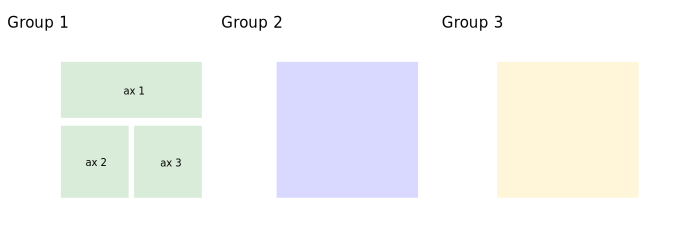

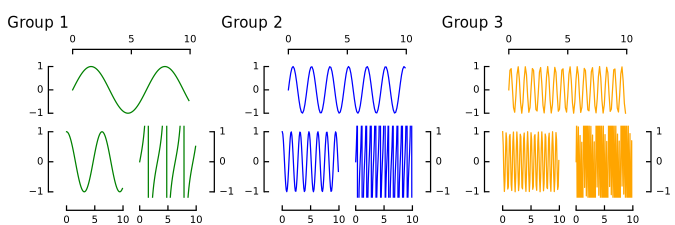

In [17]:
template_filename = 'figure_groups_and_templates.svg'
output_filename = 'figure_groups_and_templates_output.svg'
make_plot(template_filename, output_filename)

# Display the layout and svg and the data svg
plt.close('all')
display(SVG('figure_groups_and_templates.svg'))
display(SVG('figure_groups_and_templates_output.svg'))

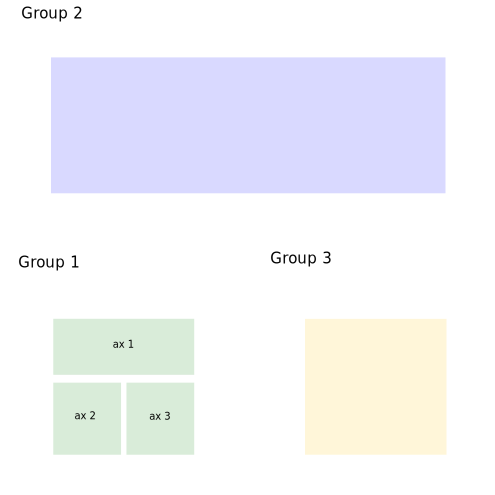

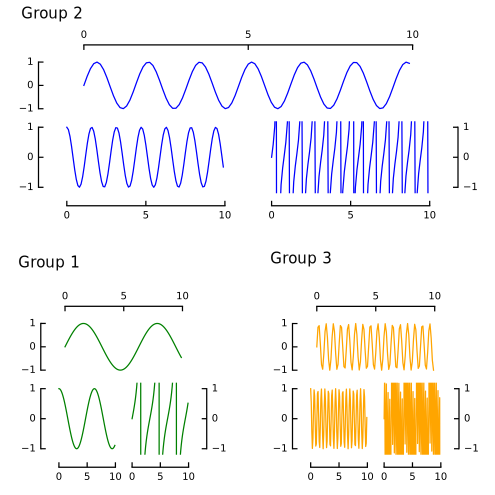

In [18]:
# Now generate the same plot with a different layout. Note, the code does not change.
template_filename = 'figure_groups_and_templates_vertical.svg'
output_filename = 'figure_groups_and_templates_vertical_output.svg'
make_plot(template_filename, output_filename)

# display the layout and svg and the data svg
plt.close('all')
display(SVG('figure_groups_and_templates_vertical.svg'))
display(SVG('figure_groups_and_templates_vertical_output.svg'))